In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(ride_df,city_df)
# Display the data table for preview
combined_df.head()

C:\Users\wl030\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\wl030\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll
C:\Users\wl030\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
  stacklevel=1)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
#combined_df.groupby(['city','type']).count().sort_values('city')
#combined_df['type'].value_counts()
#combined_df.head()

In [39]:
#city_df.describe()
#ride_df.describe()
#combined_df.describe()
#combined_df.head()

##### build df for total number of rides per city
type_ride_id_df = combined_df[['city','type','ride_id']]
groupby_city_type = type_ride_id_df.groupby(['city','type']).count()
groupby_city_type  =groupby_city_type.rename(columns = {'ride_id':'total_num_rides'})
groupby_city_type= groupby_city_type.reset_index(['city','type'],drop=False)
groupby_city_type = groupby_city_type.sort_values('city')

##### build df for average fare ($) per city
type_fare_df = combined_df[['city','type','fare']]
groupby_fare = type_fare_df.groupby(['city','type']).mean()
groupby_fare =groupby_fare.rename(columns={'fare':'average fare'})
groupby_fare=groupby_fare.reset_index(['city','type'],drop=False)
groupby_fare = groupby_fare.sort_values('city')

##### build df for size per city
type_driver_df = combined_df[['city','type','driver_count']]
#groupby_driver= type_driver_df.groupby(['city','type']).sum()  ###bug
groupby_driver= type_driver_df.drop_duplicates()
#groupby_driver=groupby_driver.reset_index(['city','type'],drop=False) ###bug
groupby_driver=groupby_driver.sort_values('city')

##### x df for each city type
x_urban_cities_df = groupby_city_type[groupby_city_type['type']=='Urban']
x_rural_cities_df=groupby_city_type[groupby_city_type['type']=='Rural']
x_suburban_cities_df=groupby_city_type[groupby_city_type['type']=='Suburban']

##### y df for each city type
y_urban_cities_df = groupby_fare[groupby_fare['type']=='Urban']
y_rural_cities_df=groupby_fare[groupby_fare['type']=='Rural']
y_suburban_cities_df=groupby_fare[groupby_fare['type']=='Suburban']

##### s df for each city type
s_urban_cities_df = groupby_driver[groupby_driver['type']=='Urban']
s_rural_cities_df=groupby_driver[groupby_driver['type']=='Rural']
s_suburban_cities_df=groupby_driver[groupby_driver['type']=='Suburban']

##### x series for each city type
x_urban_cities_series = x_urban_cities_df['total_num_rides']
x_rural_cities_series = x_rural_cities_df['total_num_rides']
x_suburban_cities_series = x_suburban_cities_df['total_num_rides']

##### y series for each city type
y_urban_cities_series = y_urban_cities_df['average fare']
y_rural_cities_series = y_rural_cities_df['average fare']
y_suburban_cities_series = y_suburban_cities_df['average fare']

##### s series for each city type
scale = 10
s_urban_cities_series = s_urban_cities_df['driver_count']*scale
s_rural_cities_series = s_rural_cities_df['driver_count']*scale
s_suburban_cities_series = s_suburban_cities_df['driver_count']*scale



##### display
#groupby_fare
#y_urban_cities_df
#x_urban_cities_series.describe()
#print(s_rural_cities_df.describe())
#print(s_urban_cities_df.describe())
#x_urban_cities_df
#s_urban_cities_series
#s_urban_cities_df
#type_driver_df
#x_urban_cities_series
#y_urban_cities_df

#x_urban_cities_df.sort_values('total_num_rides', ascending=False)
#s_urban_cities_df
#type_driver_df.drop_duplicates()

## Bubble Plot of Ride Sharing Data

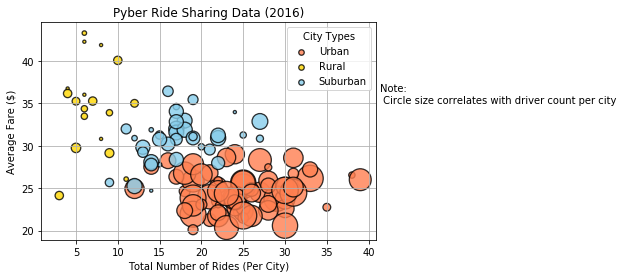

In [44]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
plt.scatter(x_urban_cities_series,y_urban_cities_series, alpha=0.8,facecolors='Coral',edgecolors='black'
           ,label='Urban', s = s_urban_cities_series,linewidth=1.3)
plt.scatter(x_rural_cities_series,y_rural_cities_series, alpha=0.8,facecolors='gold',edgecolors='black'
           ,label='Rural', s = s_rural_cities_series,linewidth=1.3)
plt.scatter(x_suburban_cities_series,y_suburban_cities_series, alpha=0.8,facecolors='SkyBlue',edgecolors='black'
           ,label='Suburban', s= s_suburban_cities_series,linewidth=1.3)

# Incorporate the other graph properties
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
lgnd = plt.legend(loc='best', title="City Types")
#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
textstr = "Note:\n Circle size correlates with driver count per city"
plt.text(.91, 0.6, textstr, fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('bubble_plot.png')
plt.show()

##### wl-tbd bugs:
###1. sizing in legend ---> fixed
###2. scaling of sizes circles ---> fixed

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

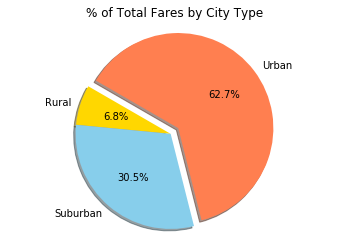

In [50]:
#prework
#pie1= combined_df.groupby('type').count()
groupby_type_df = combined_df.groupby('type').sum()
fare_series = groupby_type_df['fare']
total_fares = fare_series.sum()
#total = 2375 or 59,210.71

# Calculate Type Percents
pie1_df = (fare_series/total_fares)*100
# Build Pie Chart
labels = ['Rural','Suburban','Urban']
colors = ['Gold', 'SkyBlue', 'Coral']
explode=[0,0,0.1]
plt.pie(fare_series,labels=labels,colors=colors
       ,autopct="%1.1f%%", shadow=True, startangle=150
       ,explode = explode)
plt.axis('equal')
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig('total_fares.png')

#groupby_type_df
#fare_series
#total_fares
pie1_df

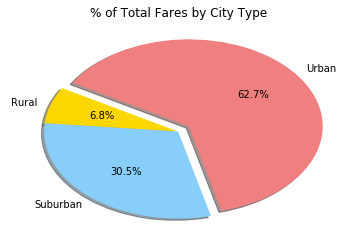

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

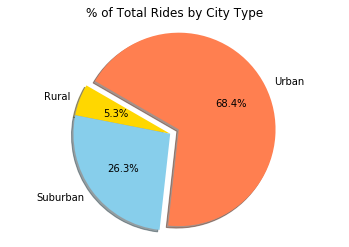

In [51]:
#prework
#total = 2375 using count() and ride id
total_ride_groupby_type = combined_df.groupby('type').count()
ride_series = total_ride_groupby_type['ride_id']
total_rides = ride_series.sum()
# Calculate Ride Percents
pie2_df = (ride_series/total_rides)*100

# Build Pie Chart
labels = ['Rural','Suburban','Urban']
colors = ['Gold', 'SkyBlue', 'Coral']
explode=[0,0,0.1]
plt.pie(ride_series,labels=labels,colors=colors
       ,autopct="%1.1f%%", shadow=True, startangle=150
       ,explode = explode)
plt.axis('equal')
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig('total_rides.png')

#total_ride_groupby_type
#total_rides
pie2_df

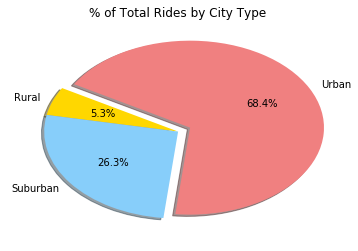

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

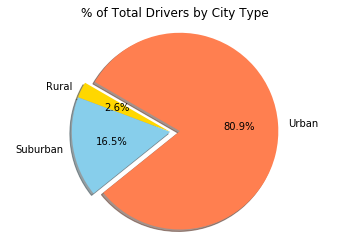

In [52]:
# Calculate Driver Percents
#total_drivers = 2973
#urban_drivers = 2405
groupby_type = city_df.groupby('type').sum()
#rural_drivers = groupby_type.iloc
total_drivers = groupby_type['driver_count'].sum()  ###total drivers = 
#total_drivers
pie3_df=(groupby_type/total_drivers)*100
pie3_series=pie3_df['driver_count']

# Build Pie Charts
#,autopct="%1.1f%%", shadow=True, startangle=150
labels = ['Rural','Suburban','Urban']
colors = ['Gold', 'SkyBlue', 'Coral']
explode=[0,0,0.1]
plt.pie(pie3_series,labels=labels,colors=colors
       ,autopct="%1.1f%%", shadow=True, startangle=150
       ,explode = explode)
plt.axis('equal')
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig('total_drivers')
#pie3_series

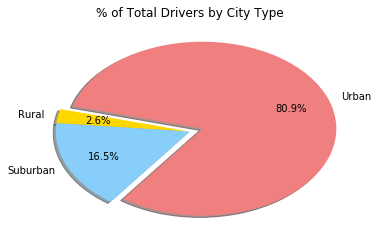

In [6]:
# Show Figure
plt.show()

## 3 observable trends
1. The average fair is greater in rural areas compared to suburban and urban.
2. Urban cities have more rides per city than rural areas.
3. There are more drivers in urban cities than rural areas.
